In [1]:
#Import libraries 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [3]:
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",header=None)
attribute_name = []
attribute_name.append("case_id")
attribute_name.append("type")

a = ['radius','texture','perimeter','area','smoothness','compactness',
     'concavity','concave points','symmetry','fractal dimension']

for i in range(0,10):
    b = "mean_" + a[i] 
    attribute_name.append(b)   
for i in range(0,10):
    b = "se_" + a[i]
    attribute_name.append(b)    
for i in range(0,10):
    b = "worst_" + a[i]
    attribute_name.append(b)
    
df.columns=attribute_name
df.head()

,case_id,type,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
df.describe()

,case_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion':['gini','entropy']}],
                  scoring='accuracy',
                  cv=inner_cv)
gs_dt = gs_dt.fit(X,y)

print("Parameter Tuning for Decision Tree")
print("Non-nested CV Accuracy: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt = cross_val_score(gs_dt, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

Parameter Tuning for Decision Tree
Non-nested CV Accuracy:  0.9472442167365316
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 5}
Optimal Estimator:  DecisionTreeClassifier(max_depth=5, random_state=42)
Nested CV Accuracy:  0.9350256171401956  +/-  0.02688286506933356


In [4]:
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

gs_lr2 = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=inner_cv)

gs_lr2 = gs_lr2.fit(X,y)
print("Parameter Tuning for Logistic Regression")
print("Non-nested CV Accuracy: ", gs_lr2.best_score_)
print("Optimal Parameter: ", gs_lr2.best_params_)
print("Optimal Estimator: ", gs_lr2.best_estimator_)
nested_score_gs_lr2 = cross_val_score(gs_lr2, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr2.mean(), " +/- ", nested_score_gs_lr2.std())


Parameter Tuning for Logistic Regression
Non-nested CV Accuracy:  0.9630802670392796
Optimal Parameter:  {'C': 1000000, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=1000000, random_state=42, solver='liblinear')
Nested CV Accuracy: 0.9543238627542306  +/-  0.015048933559746427


In [5]:
#Normalize Data
pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', KNeighborsClassifier(p=2, 
                           metric='minkowski')) 
    ])

#Or instead, could standardize through this instead of pipe
#from sklearn.preprocessing import StandardScaler 

#sc = StandardScaler()
#sc.fit(X_train)

params = {
        'knn__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
        'knn__weights': ['uniform', 'distance']
    }

gs_knn2 = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='accuracy',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn2 = gs_knn2.fit(X,y)  
print("Parameter tuning for KNN")
print("Non-nested CV Accuracy: ", gs_knn2.best_score_)
print("Optimal Parameter: ", gs_knn2.best_params_)
print("Optimal Estimator: ", gs_knn2.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn2 = cross_val_score(gs_knn2, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())

Parameter tuning for KNN
Non-nested CV Accuracy:  0.9683589504735289
Optimal Parameter:  {'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])
Nested CV Accuracy:  0.9630957925787922  +/-  0.014027872671634403


In [8]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)): 
       
    plt.figure()                   
    plt.title(title)
    if ylim is not None:           
        plt.ylim(*ylim)
    plt.xlabel("Training examples") 
    plt.ylabel("Score")           
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1)   
    test_scores_mean = np.mean(test_scores, axis=1) 
    test_scores_std = np.std(test_scores, axis=1)    

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")

    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") 
    return plt 

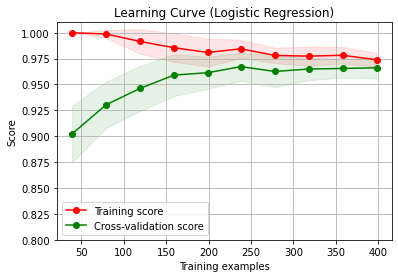

In [9]:
title = "Learning Curve (Logistic Regression)"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression(C=100, penalty='l2', random_state=42, solver='liblinear')
plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=4)

plt.show() 

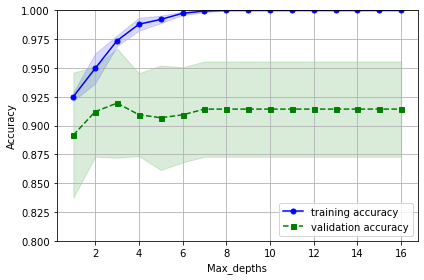

In [13]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

param_range=np.arange(1,17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
train_scores, test_scores = validation_curve( 
                    estimator=DecisionTreeClassifier(random_state=42), 
                X=X_train, 
                y=y_train, 
                param_name="max_depth", 
                param_range=param_range,
                cv=10,     #10-fold cross-validation
                scoring="accuracy", 
                n_jobs=4)

# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-v alidation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.xscale('linear')
plt.legend(loc='lower right')
plt.xlabel('Max_depths')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0]) # y limits in the plot
plt.tight_layout()

plt.show()    

ROC AUC: 0.99 (+/- 0.01) [Logistic regression]
ROC AUC: 0.96 (+/- 0.02) [Decision tree]
ROC AUC: 0.99 (+/- 0.01) [kNN]


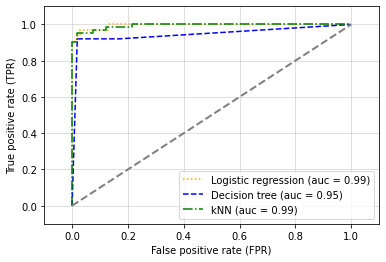

In [11]:
# Logistic Regression Classifier
clf1 = LogisticRegression(C=1000000, penalty='l2', random_state=42, solver='liblinear')

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# kNN Classifier
clf3 = Pipeline(steps=[('sc', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=9, weights='distance'))])

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()